# Diffusivity

This notebook analyze the diffusivity based on the trajectory data.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from skimage import io
from corrLib import readdata
import dufte
plt.style.use(dufte.style)

In [155]:
folder = '/home/zhengyang/data/DE/07212021/2021-07-21_16h41m52s/images'
data = pd.read_csv(os.path.join(folder, 'crop_HoughCircles', 'xyz-traj.csv'))

In [156]:
t = tp.link(data.rename(columns={'filename': 'frame'}), 30)

Frame 7162: 1 trajectories present.


(-0.5, 424.5, 387.5, -0.5)

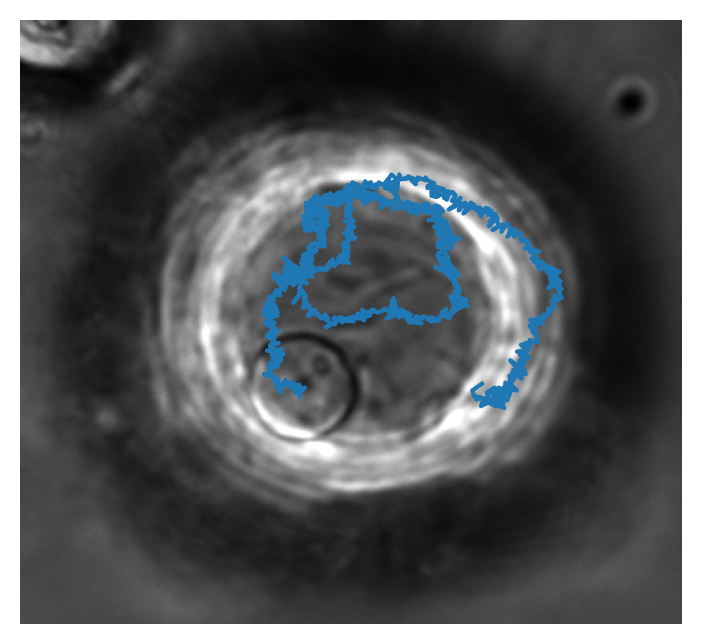

In [162]:
mpp = 0.16
l = readdata(folder, 'tif')
img = io.imread(l.Dir.iloc[0])
plt.figure(dpi=200)
plt.imshow(img, cmap='gray')
plt.plot(data.x/mpp, data.y/mpp)
plt.axis('off')

In [168]:
msd = tp.msd(t, mpp=1, fps=30, max_lagtime=1500)
msd3 = tp.msd(t.dropna(), mpp=1, fps=30, max_lagtime=1500, pos_columns=['z', 'x', 'y'])

In [169]:
msd3

,<z>,<x>,<y>,<z^2>,<x^2>,<y^2>,msd,lagt
lagt,,,,,,,,
1,-0.002217,0.009756,0.000111,0.005366,0.175277,0.177483,0.358126,0.033333
2,-0.004437,0.019745,0.000776,0.012113,0.195818,0.203206,0.411137,0.066667
3,-0.006659,0.030189,0.001221,0.020511,0.217014,0.235638,0.473163,0.100000
4,-0.008884,0.040366,0.001666,0.030294,0.248878,0.262810,0.541982,0.133333
5,-0.011111,0.051333,0.001944,0.040411,0.296444,0.295639,0.632494,0.166667
...,...,...,...,...,...,...,...,...
1496,-3.059547,22.205825,-4.389968,10.666149,516.856505,165.424304,692.946958,49.866667
1497,-3.069481,22.248052,-4.376948,10.702792,518.525260,165.022890,694.250942,49.900000
1498,-3.079479,22.290228,-4.365472,10.740717,520.168046,164.471922,695.380684,49.933333


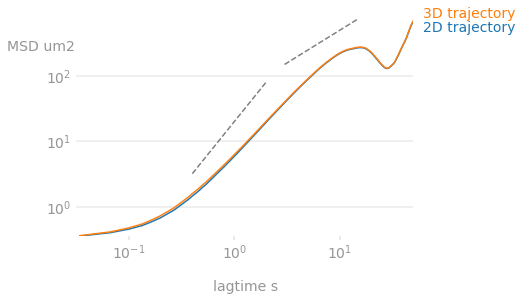

In [174]:
plt.plot(msd.lagt, msd.msd, label='2D trajectory')
plt.plot(msd3.lagt, msd3.msd, label='3D trajectory')

# plt.plot([1e-1, 60], [d**2, d**2], ls='--', color='gray', label='Diameter 5200')
plt.loglog()

x = np.array([.4, 2])
y = 20* x ** 2
plt.plot(x, y, color='gray', ls='--')

x = np.array([3, 15])
y =  50* x ** 1
plt.plot(x, y, color='gray', ls='--')
dufte.ylabel('MSD um2')
plt.xlabel('lagtime s')
dufte.legend()

**Comments:**
- Cristian's data shows ballistic regime at ~0.02 s, diffusive regime at ~1 s and subdiffusive (plateau) regime at ~10 s. To produce data that is comparable to his, longer video with higher frame rate is necessary (80 fps for 1000 s)
- In the video(0716/3), the outer droplet moves significantly. As a result, the motion of inner droplet is affected. For more accurate analysis, I need to track the outer droplet and subtract its motion from the inner's.
- 3D trajectory is obtained (0720/16h42m). 2D and 3D MSD's are compared. They are very similar in long time limit, indicating that Z-motion is weaker than XY-motion. 3D MSD is higher in short time limit, likely due to manual tracking error.

## MSD of different experiments

In [186]:
d = {} # traj data directories
d['50[23]11'] = '/home/zhengyang/data/DE/07212021/2021-07-21_16h41m52s/images/crop_HoughCircles/xyz-traj.csv'
d['72[32]8'] = '/home/zhengyang/data/DE/07202021/1st-drop-tracking/2021-07-20_16h42m46s/images/crop_HoughCircles/xyz-traj.csv'
d['100[20]34'] = '/home/zhengyang/data/DE/07132021/2021-07-13_17h17m24s/images/crop_HoughCircles/xyz-traj.csv'

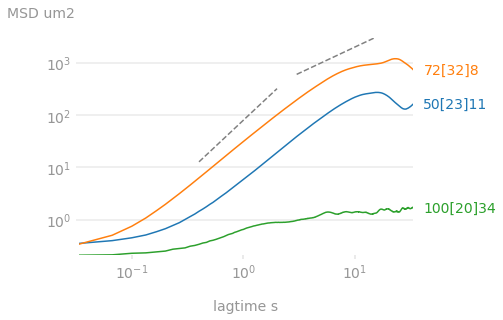

In [187]:
fig, ax = plt.subplots()
for kw in d:
    traj = pd.read_csv(d[kw]).assign(particle=0).rename(columns={'filename': 'frame'})
    msd = tp.msd(traj, mpp=1, fps=30, max_lagtime=1000)
    ax.plot(msd.lagt, msd.msd, label=kw)
ax.loglog()
dufte.legend()
dufte.ylabel('MSD um2')
ax.set_xlabel('lagtime s')

x = np.array([.4, 2])
y = 80* x ** 2
ax.plot(x, y, color='gray', ls='--')

x = np.array([3, 15])
y =  200* x ** 1
ax.plot(x, y, color='gray', ls='--')